# Homework 3: Gradient descent on MSE cost function

## MODELADO DE DATOS CON REDES NEURONALES

Professor: Michal Hemmerling \
e-mail: michal.hemmerling@udea.edu.co

Student: Camilo José Torres Castaño \
e-mail: cjose.torres@udea.edu.co \
C.c. 1036401258


In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Preprocessing Input data
data = pd.read_csv('data.csv')
X = np.array(data.iloc[:, 0])
Y = np.array(data.iloc[:, 1])

In [3]:
# Gradient descent on MSE cost function

# Initail parameters
theta_1 = 10     # initial values of   
theta_0 = 10     # y=theta_1*x + theta_0  
alpha = 0.0001   # The learning Rate  b
epochs = 100     # The number of iterations  
m = len(X)
hx=theta_1*X + theta_0  # calculate the first hypothesis

MSE = []
MAE = []
MAPE = []

for i in range(epochs):
    # ----------- MAE -----------------
    mae = sum(np.abs(Y - hx))/m
    MAE.append(mae)
    
    # ----------- MAPE -----------------
    mape = 100*sum(np.abs((Y - hx)/Y))/m
    MAPE.append(mape)
    
    # ----------- MSE -----------------
    mse = sum((Y - hx)**2)/(2*m)
    MSE.append(mse)
    
    d_theta0 = -sum((Y - hx))/m
    d_theta1 = -sum(((Y - hx)*X))/m
    
    # Update the new theta0 and theta1
    theta_0 = theta_0 - alpha*d_theta0
    theta_1 = theta_1 - alpha*d_theta1
    
    hx=theta_1*X + theta_0  # calculate the hypothesis

print('Gradient descent on MSE cost function.')
print('theta_0 = ',theta_0)
print('theta_1 = ',theta_1)

Gradient descent on MSE cost function.
theta_0 =  9.829227849520889
theta_1 =  1.2889137694663224


In [4]:
# Function to fit
def func(x, a0, a1):
    return a0 + a1 * x

# Initial parameters 
p0=np.array([10,10])

# Fitting with scipy
popt, pcov = curve_fit(func, X, Y, p0, method='lm')
perr = np.sqrt(np.diag(pcov))

print('Fitted with scipy')
print('theta_0 = ',popt[0])
print('theta_1 = ',popt[1])

Fitted with scipy
theta_0 =  9.90860654749229
theta_1 =  1.287357358541719


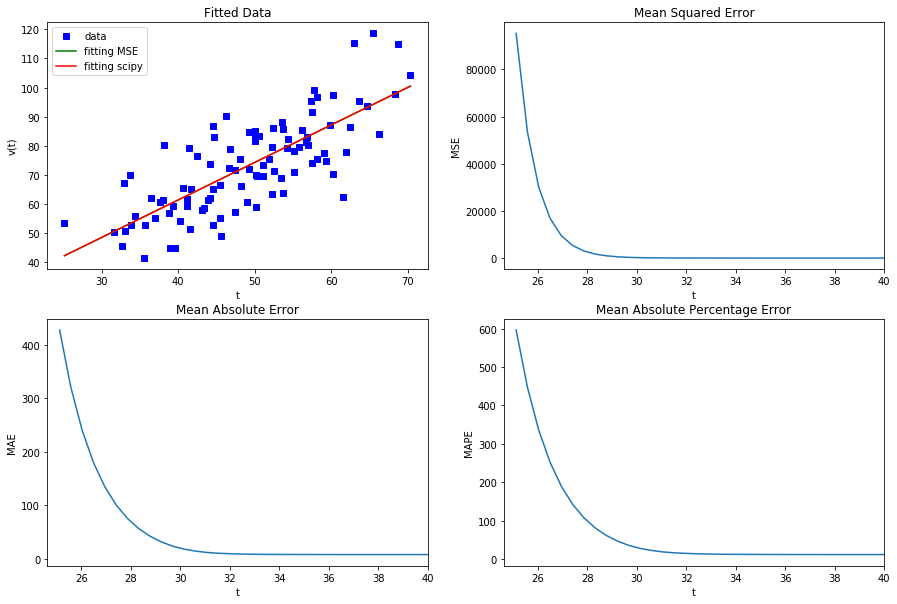

In [5]:
X_fit=np.linspace(np.min(X),np.max(X),100)
Y_fit_GD=theta_1*X_fit + theta_0
Y_fit_scipy= popt[1]*X_fit + popt[0]

fig,ax=plt.subplots(2,2,figsize=(15,10))
ax[0,0].plot(X,Y,'sb', label='data')
ax[0,0].set_title("Fitted Data")
ax[0,0].plot(X_fit,Y_fit_GD,'-g', label='fitting MSE')
ax[0,0].plot(X_fit,Y_fit_scipy,'-r', label='fitting scipy')
ax[0,0].set_xlabel("t")
ax[0,0].set_ylabel("v(t)")
ax[0,0].legend()

ax[0,1].plot(X_fit, MSE)
ax[0,1].set_xlim(np.min(X)-0.5,40)
ax[0,1].set_title("Mean Squared Error")
ax[0,1].set_xlabel("t")
ax[0,1].set_ylabel("MSE")

ax[1,0].plot(X_fit, MAE)
ax[1,0].set_xlim(np.min(X)-0.5,40)
ax[1,0].set_title("Mean Absolute Error")
ax[1,0].set_xlabel("t")
ax[1,0].set_ylabel("MAE")

ax[1,1].plot(X_fit, MAPE)
ax[1,1].set_xlim(np.min(X)-0.5,40)
ax[1,1].set_title("Mean Absolute Percentage Error")
ax[1,1].set_xlabel("t")
ax[1,1].set_ylabel("MAPE")

plt.show()

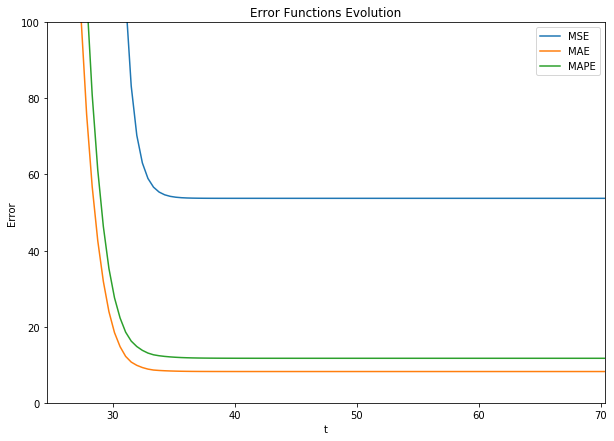

In [6]:
fig,ax=plt.subplots(1,1,figsize=(10,7))

ax.plot(X_fit, MSE,label="MSE")
ax.plot(X_fit, MAE,label="MAE")
ax.plot(X_fit, MAPE,label="MAPE")
ax.set_title("Error Functions Evolution")
ax.set_xlabel("t")
ax.set_ylabel("Error")
ax.set_xlim(np.min(X)-0.5,np.max(X))
ax.set_ylim(0,100)
ax.legend()

plt.show()